In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img  = cv2.imread("data/test1.bmp",0)
show(img)
img1  = cv2.imread("data/test 2.bmp",0)
show(img1)


In [4]:
element

NameError: name 'element' is not defined

In [5]:
def hit(image, temp,a,b):
    c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] == image[b-h_t//2+v,a-w_t//2+u]:
                return 255
    return 0

In [6]:
def fit(image, temp,a,b):
#     c = 0
    h_t, w_t = temp.shape
    
    for u in range(0,w_t):
        for v in range(0,h_t):
            if temp[v,u] == 255 and temp[v,u] != image[b-h_t//2+v,a-w_t//2+u]:
                return 0
    return 255

In [7]:
def dilation(img,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = hit(img,t,i,j)
            empty[j,i] = c
    return empty

In [8]:
def erosion(img,t):
    h,w  = img.shape
    h_t, w_t = t.shape
    empty = np.zeros((h,w))
    for i in range(w_t//2,w-w_t//2):
        for j in range(h_t//2,h-h_t//2):
            c = fit(img,t,i,j)
            empty[j,i] = c
    return empty

In [9]:
def opening(img,temp):
    return dilation(erosion(img,temp),temp)

def closing(img,temp):
    return erosion(dilation(img,temp),temp)

In [10]:
element = np.array(([0,1,0],[1,1,1],[0,1,0]))*255
element = np.array(([1,1,1],[1,1,1],[1,1,1]))*255
element = np.array(([1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]))*255
element = np.array(([1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]))*255
element = np.array(([0,0,0,1,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,0,1,0,0,0]))*255

In [11]:
element = np.array(([0,0,0,1,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [1,1,1,1,1,1,1],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,1,0,0,0]))*255

In [12]:
ele_cir7 = np.array(([0, 0, 0, 1, 0, 0, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1, 1, 1],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 0, 0, 1, 0, 0, 0]))*255

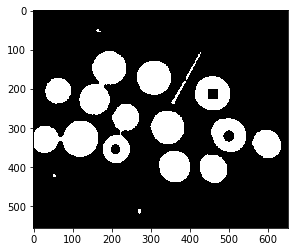

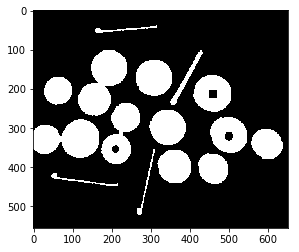

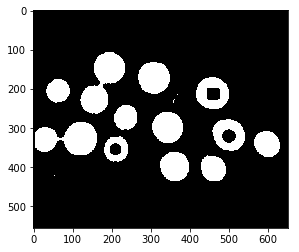

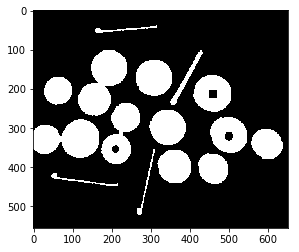

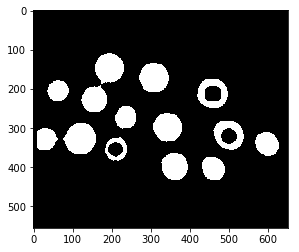

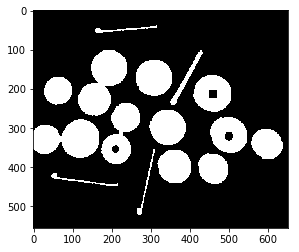

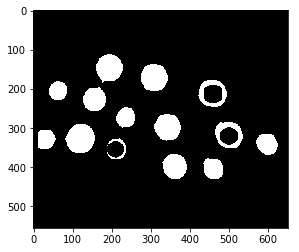

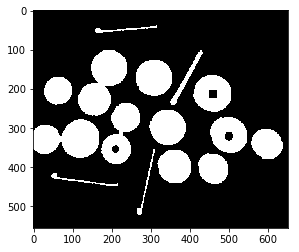

In [14]:
d = img
for i in range(4):
    d = erosion(d,ele_cir7)
    plt.imshow(d, cmap='gray')
    plt.imshow(img, cmap='gray')
plt.show()#4

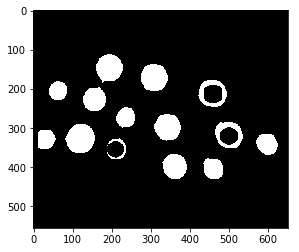

In [17]:
plt.imshow(d, cmap='gray')
plt.show()

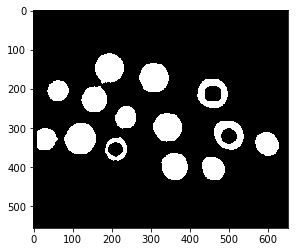

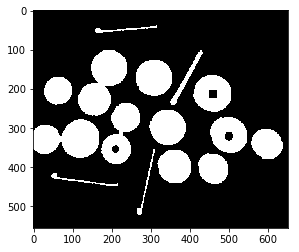

In [18]:
d = dilation(d,ele_cir7)
plt.imshow(d, cmap='gray')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()#1

In [19]:
f = d.copy()

In [20]:
# Read image
# im_in = cv2.imread("nickel.jpg", cv2.IMREAD_GRAYSCALE);

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
f = f.astype(np.uint8)

th, im_th = cv2.threshold(f, 220, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

# Display images.
cv2.imshow("Thresholded Image", im_th)
cv2.imshow("Floodfilled Image", im_floodfill)
cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
cv2.imshow("Foreground", im_out)
cv2.waitKey(0)
cv2.des

176